In [1]:
# TO BE RUN ONLY ONCE!
import os
os.chdir("../..")

In [2]:
import numpy as np
import pandas as pd
import pickle 
import matplotlib.pyplot as plt

import subprocess
import pymc3 as pm
import seaborn as sns

import spatial_mix.hdp_utils as hdp_utils
from spatial_mix.utils import *
from spatial_mix.protos.py.univariate_mixture_state_pb2 import UnivariateState, UnivariateMixtureState, HdpState

current_palette = sns.color_palette()

In [30]:
nX = [2, 4, 8, 16]
num_areas = [n**2 for n in nX]
num_samples = 10
valid_indices = np.array([0, 2, 3]) # per rimuovere il 16, che è il secondo

In [31]:
# load data
data_path = "data/simulation2/server"

times_sp= np.zeros((len(num_areas), num_samples))
# import execution times
for i in valid_indices:
    for j in range(num_samples):
        try:
            with open(os.path.join(data_path, 'sp_time_'+str(i)+'_'+str(j)), "rb") as fp:
                times_sp[i, j] = pickle.load(fp)['time']
        except:
            times_sp[i, j] = np.nan

times_hdp = np.zeros((len(num_areas), num_samples))
# import execution times
for i in valid_indices:
    for j in range(num_samples):
        try:
            with open(os.path.join(data_path, 'hdp_time_'+str(i)+'_'+str(j)), "rb") as fp:
                times_hdp[i, j] = pickle.load(fp)['time']
        except:
            times_hdp[i, j] = np.nan

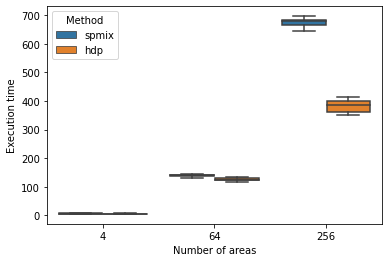

In [35]:
sp = pd.DataFrame(times_sp.T[:, valid_indices],
                  columns=[num_areas[i] for i in valid_indices])
sp = pd.melt(sp, value_vars=sp.columns, var_name='num_areas', value_name='error')
sp['Method'] = ['spmix']*sp.shape[0]

hdp = pd.DataFrame(times_hdp.T[:, valid_indices],
                   columns=[num_areas[i] for i in valid_indices])
hdp = pd.melt(hdp, value_vars=hdp.columns, var_name='num_areas', value_name='error')
hdp['Method'] = ['hdp']*hdp.shape[0]

# join dataframe
plt_data = pd.concat([sp, hdp], axis=0)

ax = sns.boxplot(x="num_areas", y="error",
            hue="Method", palette=['#1f77b4', '#ff7f0e'],
            data=plt_data)
ax.set_xlabel('Number of areas')
ax.set_ylabel('Execution time')
plt.savefig('times_sim2.png')
plt.show()



### zoom

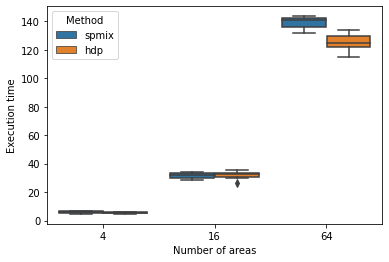

In [16]:

sp = pd.DataFrame(times_sp.T[:, :-1],
                  columns=num_areas[:-1])
sp = pd.melt(sp, value_vars=sp.columns, var_name='num_areas', value_name='error')
sp['Method'] = ['spmix']*sp.shape[0]

hdp = pd.DataFrame(times_hdp.T[:, :-1],
                   columns=num_areas[:-1])
hdp = pd.melt(hdp, value_vars=hdp.columns, var_name='num_areas', value_name='error')
hdp['Method'] = ['hdp']*hdp.shape[0]

# join dataframe
plt_data = pd.concat([sp, hdp], axis=0)

ax = sns.boxplot(x="num_areas", y="error",
            hue="Method", palette=['#1f77b4', '#ff7f0e'],
            data=plt_data)
ax.set_xlabel('Number of areas')
ax.set_ylabel('Execution time')
plt.savefig('times_sim2_zoom.png')
plt.show()

## Errors

In [7]:
### KL divergence

In [8]:
# import errors

errors = {}
names = ['spmix', 'hdp']
errors['spmix'] = np.zeros((len(num_areas), num_samples))
errors['hdp'] = np.zeros((len(num_areas), num_samples))

for n in names:
    for i, a in enumerate(num_areas):
        for j in range(num_samples):
            file_name = os.path.join(data_path, n + '/dens/areas'+str(a)+'/'+str(j)+'.pickle')
            try:
                with open(file_name, "rb") as fp:
                    e = pickle.load(fp)
                    errors[n][i, j] = np.mean([t[2] for t in e['kl_divs']])
            except:
                errors[n][i, j] = np.nan

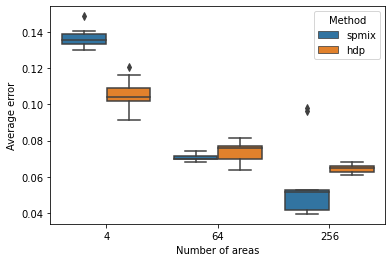

In [36]:
import seaborn as sns

sp = pd.DataFrame(errors['spmix'].T[:, valid_indices],
                  columns=[num_areas[i] for i in valid_indices])
sp = pd.melt(sp, value_vars=sp.columns, var_name='num_areas', value_name='error')
sp['Method'] = ['spmix']*sp.shape[0]

hdp = pd.DataFrame(errors['hdp'].T[:, valid_indices],
                   columns=[num_areas[i] for i in valid_indices])
hdp = pd.melt(hdp, value_vars=hdp.columns, var_name='num_areas', value_name='error')
hdp['Method'] = ['hdp']*hdp.shape[0]

# join dataframe
plt_data = pd.concat([sp, hdp], axis=0)

ax = sns.boxplot(x="num_areas", y="error",
            hue="Method", palette=['#1f77b4', '#ff7f0e'],
            data=plt_data)
ax.set_xlabel('Number of areas')
ax.set_ylabel('Average error')
plt.savefig('kl_errors_sim2.png')
plt.show()

### Hellinger distance

In [37]:
# import errors
num_samples = 10
errors = {}
names = ['spmix', 'hdp']
errors['spmix'] = np.zeros((len(num_areas), num_samples))
errors['hdp'] = np.zeros((len(num_areas), num_samples))

for n in names:
    for i, a in enumerate(num_areas):
        for j in range(num_samples):
            file_name = os.path.join(data_path, n + '/dens/areas'+str(a)+'/'+str(j)+'.pickle')
            try:
                with open(file_name, "rb") as fp:
                    e = pickle.load(fp)
                    errors[n][i, j] = np.mean([t[2] for t in e['hell_dist']])
            except:
                errors[n][i, j] = np.nan

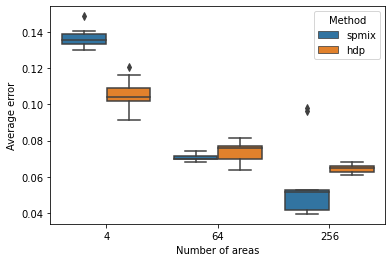

In [38]:
import seaborn as sns

sp = pd.DataFrame(errors['spmix'].T[:, valid_indices],
                  columns=[num_areas[i] for i in valid_indices])
sp = pd.melt(sp, value_vars=sp.columns, var_name='num_areas', value_name='error')
sp['Method'] = ['spmix']*sp.shape[0]

hdp = pd.DataFrame(errors['hdp'].T[:, valid_indices],
                   columns=[num_areas[i] for i in valid_indices])
hdp = pd.melt(hdp, value_vars=hdp.columns, var_name='num_areas', value_name='error')
hdp['Method'] = ['hdp']*hdp.shape[0]

# join dataframe
plt_data = pd.concat([sp, hdp], axis=0)

ax = sns.boxplot(x="num_areas", y="error",
            hue="Method", palette=['#1f77b4', '#ff7f0e'],
            data=plt_data)
ax.set_xlabel('Number of areas')
ax.set_ylabel('Average error')
plt.savefig('hellinger_errors_sim2.png')

plt.show()